<a href="https://colab.research.google.com/github/HilkarSoberanes/MachineLearning/blob/main/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=4 color='cornflowerblue'>

# Convolutional Neural Network (CNN) Implementation using the dataset MINIST



The MNIST dataset is comprised of 70000 28 pixels by 28 pixels images of handwritten digits and 70000 vectors containing information on which digit each one is.

## Importing Necessary Modules/Packages 

In [ ]:
from google.colab import drive # Google Drive package 
from IPython.display import Image #Display png Images
drive.mount("/content/drive") #Acces My Google Drive
import numpy as np #Numeric Python Library
from sklearn.metrics import confusion_matrix #Basic Machine Learning library
import pandas as pd #Dataframes managment library
import seaborn as sns #Data Visualization library
import keras #Popular Deep Learning FrameWork
from keras import layers #Layes of a Neural Network (NN)
from keras.layers import Input, Dense, Activation, Flatten #NN Arquitecture
from keras.layers import Dropout #Reduces Overfitting
from keras.models import Model #Compile NN Arquitecture
from keras.preprocessing import image #Visualization
from keras.utils import layer_utils #Keras Tools
from keras.utils.data_utils import get_file #Import dataset
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model # Model squematic
from tensorflow.keras.optimizers import Adam #Optimizer (Gradient Descent)
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D #Convolutianl Layer Structure
from keras.models import Sequential #Join Layers
import matplotlib.pyplot as plt #Visualization package
from matplotlib.pyplot import imshow #Image Display
from tensorflow.keras.utils import to_categorical #Decimal to Binary Numeric System
from tensorflow.keras.losses import BinaryCrossentropy 
from PIL import Image
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

np.random.seed(1)
%matplotlib inline

Mounted at /content/drive


<font size = 5 color="cornflowerblue">

## Fiest Step: **Data exploration** 

Load dataset from Keras database [mnist Keras](https://keras.io/examples/vision/mnist_convnet/):

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #Dataset split

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('The data type of x_train is', type(x_train), 'and its dimensions are', x_train.shape) #Training data input
print('The data type of y_train is', type(y_train), 'and its dimensions are', y_train.shape) #Training data label 

print('\nThe data type of x_test is', type(x_test), 'and its dimensions are', x_test.shape) #Test input
print('The data type of y_test is', type(y_test), 'and its dimensions are', y_test.shape )#Test label

The data type of x_train is <class 'numpy.ndarray'> and its dimensions are (60000, 28, 28)
The data type of y_train is <class 'numpy.ndarray'> and its dimensions are (60000,)

The data type of x_test is <class 'numpy.ndarray'> and its dimensions are (10000, 28, 28)
The data type of y_test is <class 'numpy.ndarray'> and its dimensions are (10000,)


Pixels have a maxium value of 255 therefore we use this value for normalize the data.

In [ ]:
train_x = x_train.astype("float32") / 255 #Normalization
test_x = x_test.astype("float32") / 255 #Normalization

<font size=4>

Now we show a sample image of the data with its label.



The label of this sample is 5


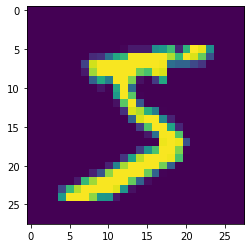

In [ ]:
sample = 0 #Sample label
plt.imshow(x_train[sample]); #2D array visualization function
print("\nThe label of this sample is",np.squeeze(y_train[sample]))

The labels of the data use an integer form but a vector represtation like one-hot will make it easier to handle. We use Keras  [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function for this

In [ ]:
y_train.reshape(-1) #Current form of labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_y=to_categorical(y_train, num_classes=10, dtype="float32") #Transform to a vector of 0 and 1 
test_y=to_categorical(y_test, num_classes=10, dtype="float32")#Transform to a vector of 0 and 1 
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Example

The sample 9 corresponds to  4
Its one-hot representation is = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


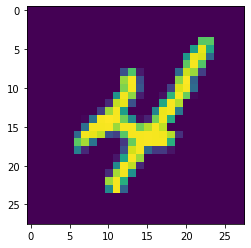

In [ ]:
sample = 9  #sample index

plt.imshow(train_x[sample]); #Visualice sample

print('The sample', sample, 'corresponds to ', int(np.argmax(train_y[sample])))
print("Its one-hot representation is =", train_y[sample])

<font size = 5 color="cornflowerblue">

Second step: **Neural Network Building**

<font size=4>

We use a convolutional neural network based in the [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) implementation
 

In [ ]:
def architecture(input_shape, num_classes, activation):
    
    model = Sequential()
    model.add(Conv2D(32, [5, 5], activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, [5, 5], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.26))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    return model

<font size=4>

We define the architecture with the form of our input and output

In [ ]:
one_image = (28, 28, 1) #Data input
activation='relu' #Activation Function
num_classes=10 #Integers from 0 to 9
model = architecture(one_image,num_classes,activation) #Model architecture

:<font size=4>

We use plo_model for an squematic represntation of our convolutional neural network (CNN) 

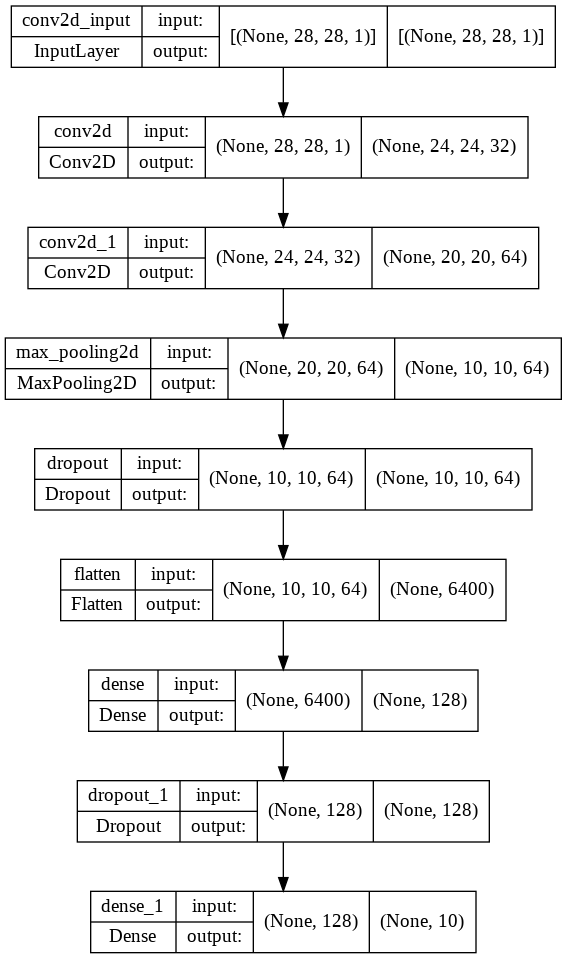

In [ ]:
plot_model(model, to_file='mnist_model.png', show_shapes=True, rankdir='TB', show_layer_names=True) #Squematic model 

In [ ]:
model.summary() #Summarizes arquitecture of CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                        

<font size=4>
We compile the model selecting an optimizer with learning rate adjustable, we also choose a loss function and good metric of accuracy for this classification problem


In [ ]:
optimizer = Adam(learning_rate = 0.0004) #Gradient descent
loss_function = BinaryCrossentropy(from_logits=True) #Measure of uncertanty between two distributions
metric_function = 'accuracy' 
model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function]) 
train_x = np.expand_dims(train_x, -1) #Unfold matrix
test_x = np.expand_dims(test_x, -1) #Unfold matrix

<font size=4>

We execute the training of the neural network

In [ ]:
validation_portion = 0.1 #Data not considered for training but to validate the output of the neural network classification
batch_size=128 #Size of the data considered in training  
num_epochs = 15 #How many times we are training the algorithm
history = model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, validation_split=validation_portion, verbose=1)

Epoch 1/15
422/422 [==============================] - 19s 21ms/step - loss: 0.1050 - accuracy: 0.8299 - val_loss: 0.0163 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0317 - accuracy: 0.9597 - val_loss: 0.0112 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0228 - accuracy: 0.9708 - val_loss: 0.0089 - val_accuracy: 0.9887
Epoch 4/15
422/422 [==============================] - 8s 18ms/step - loss: 0.0185 - accuracy: 0.9768 - val_loss: 0.0077 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 8s 18ms/step - loss: 0.0160 - accuracy: 0.9803 - val_loss: 0.0077 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0139 - accuracy: 0.9825 - val_loss: 0.0071 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0123 - accuracy: 0.9846 - val_loss: 0.0071 - val_accuracy: 0.991

<font size=4>


We compare the graph of the loss function of the training and validation sets during the trainning 


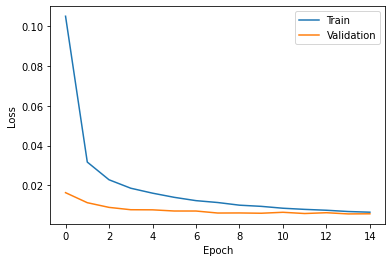

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=4>

We compare the graph of the accuracy function of the training and validation sets during the trainning 

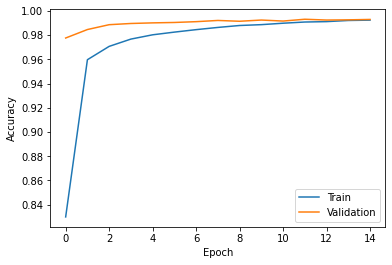

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size=4>
We use the evaluate method for a global result of our training

In [ ]:
evaluations = model.evaluate(x = test_x, y = test_y) #Use test sets not included in training 

print ("Loss = " + str(evaluations[0])) 
print ("Test Accuracy = " + str(evaluations[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9934
Loss = 0.004906333051621914
Test Accuracy = 0.993399977684021


<font size = 5 color="cornflowerblue">

Third part: **Predictions**

<font size=4>
We use the test sets to predict the classification of each number

##Test 1: Test dataset

The prediction of this sample labeled as  4 is  4


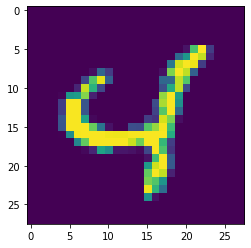

In [ ]:
predictions = model.predict(test_x) #For each number in the test use our model to predict its label
sample = 67
prediction = np.argmax(predictions[sample]) #Specific prediction for the choosen sample
plt.imshow(test_x[sample,:,:,0]) 

print('The prediction of this sample labeled as ', int(np.argmax(test_y[sample])), 'is ', prediction)

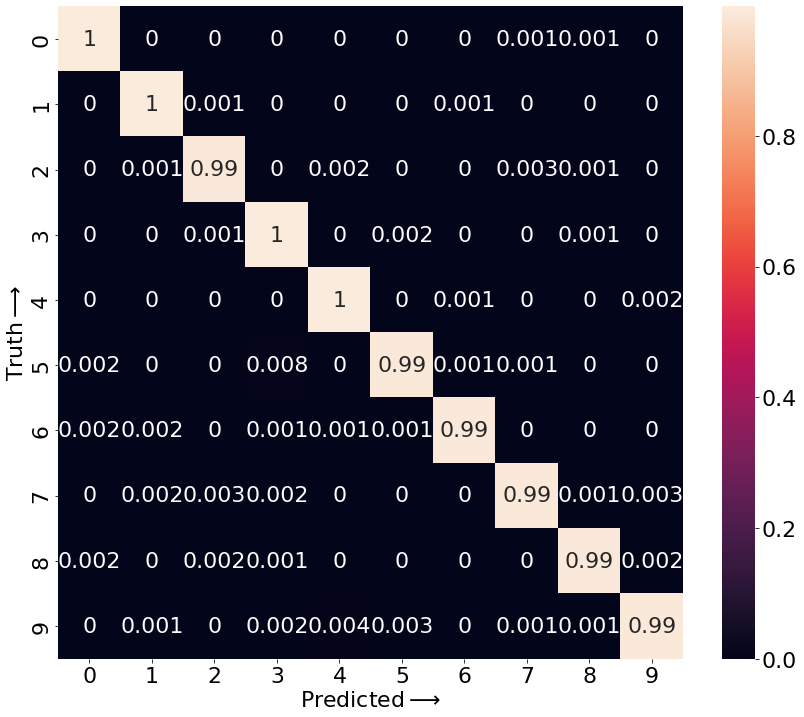

In [ ]:
predictions_array =np.array([np.argmax(predictions[i]) for i in range(len(y_test))]) #Array of all predicted labels
cm =np.around(confusion_matrix(y_true = y_test, y_pred = predictions_array, normalize = 'true'), decimals=3) #Confusion matrix array
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)]) #Confusion matrix array turned into a dataframe
plt.figure(figsize = (14,12))
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(df_cm, annot=True)
ax.set(xlabel=r'Predicted$\longrightarrow$', ylabel=r'Truth$\longrightarrow$');

##Test 2: Numbers drawn by me

In [ ]:
test_x_2 = np.array([np.array(Image.open('/content/drive/My Drive/MachineLearning/MNIST/%1i_%1i.png'%(i,j)).resize((28,28)))[:,:,:1]/255 for i in range(0,10) for j in range(1,11)])
y_test_2 = [i for i in range(10) for j in range(10)]

The prediction of this sample labeled as  8 is  8


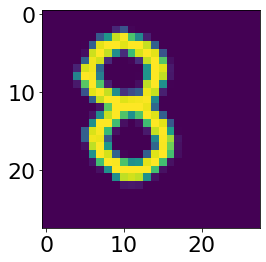

In [ ]:
predictions_2 = model.predict(test_x_2) #For each number in the test use our model to predict its label
sample = 84
prediction = np.argmax(predictions_2[sample]) #Specific prediction for the choosen sample
plt.imshow(test_x_2[sample,:,:,0]) 

print('The prediction of this sample labeled as ', int(y_test_2[sample]), 'is ', prediction)

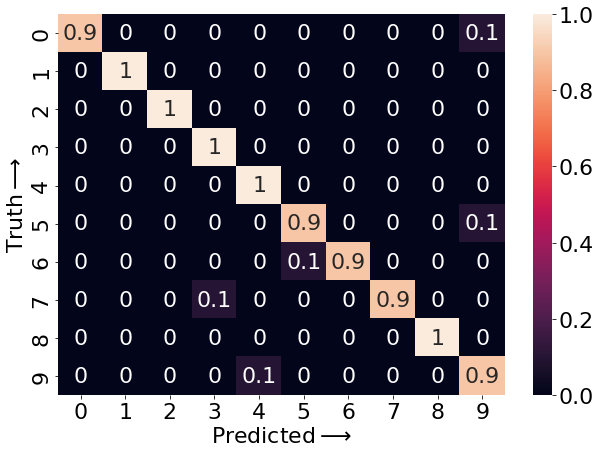

In [ ]:
predictions_array_2 =np.array([np.argmax(predictions_2[i]) for i in range(len(y_test_2))]) #Array of all predicted labels
cm =np.around(confusion_matrix(y_true = y_test_2, y_pred = predictions_array_2, normalize = 'true'), decimals=3) #Confusion matrix array
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)]) #Confusion matrix array turned into a dataframe
plt.figure(figsize = (10,7))
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(df_cm, annot=True)
ax.set(xlabel=r'Predicted$\longrightarrow$', ylabel=r'Truth$\longrightarrow$');

In [ ]:
#save_model(model,'/content/drive/My Drive/MachineLearning/MNIST/MNIST_HVSS')

INFO:tensorflow:Assets written to: /content/drive/My Drive/MachineLearning/MNIST/MNIST_HVSS/assets


In [ ]:
#model = load_model('/content/drive/My Drive/MachineLearning/MNIST/MNIST_HVSS')